<a href="https://colab.research.google.com/github/rrben/Regressao/blob/main/Regress%C3%A3o_Linear_Simples_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
#Importe o arquivo formato xlsx
imovel = pd.read_excel("imoveis.xlsx")
imovel.head()

,area,preco
0,359.87,25000
1,353.12,45000
2,341.89,45000
3,435.99,20000
4,341.77,25000


In [8]:
imovel.describe()

,area,preco
count,54.000000,54.000000
mean,457.483519,41296.296296
std,261.527053,16488.566227
min,293.220000,20000.000000
25%,355.087500,30000.000000
50%,380.360000,40000.000000
75%,470.087500,50000.000000
max,2057.570000,120000.000000


In [9]:
imovel.corr()

,area,preco
area,1.000000,0.511373
preco,0.511373,1.000000


In [10]:
imovel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    54 non-null     float64
 1   preco   54 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 992.0 bytes


<Axes: xlabel='area', ylabel='Count'>

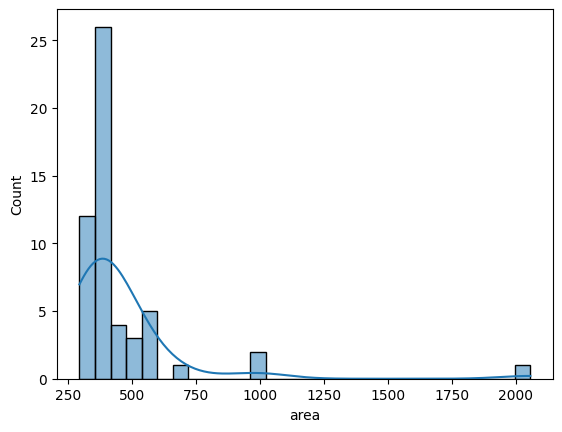

In [7]:
sns.histplot(data=imovel, x="area", kde=True)

<Axes: xlabel='preco', ylabel='Count'>

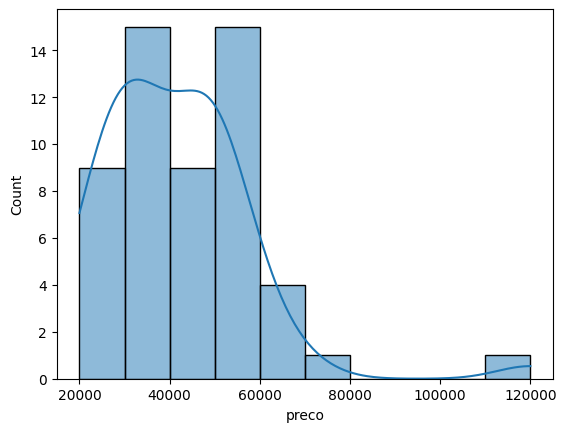

In [11]:
sns.histplot(data=imovel, x="preco", kde=True)

<Axes: xlabel='area', ylabel='preco'>

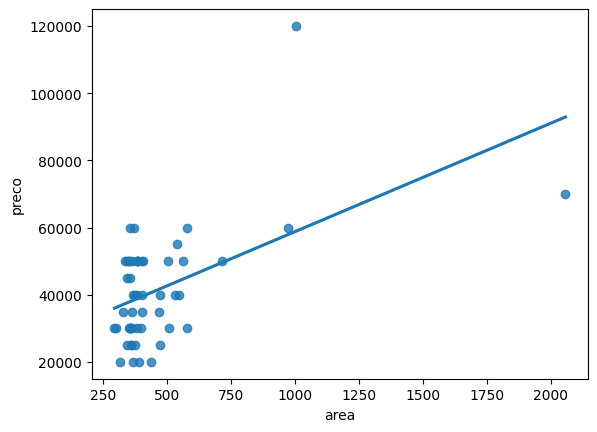

In [15]:
sns.regplot(x = "area", 
            y = "preco",  
            ci = None, 
            data = imovel) 

In [16]:
imovel.describe()

,area,preco
count,54.000000,54.000000
mean,457.483519,41296.296296
std,261.527053,16488.566227
min,293.220000,20000.000000
25%,355.087500,30000.000000
50%,380.360000,40000.000000
75%,470.087500,50000.000000
max,2057.570000,120000.000000


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


imovel_norm = pd.DataFrame(scaler.fit_transform(imovel), index=imovel.index, columns=imovel.columns)

In [17]:
imovel_norm.head()

,area,preco
0,0.037776,0.05
1,0.033950,0.25
2,0.027585,0.25
3,0.080919,0.00
4,0.027517,0.05


In [18]:
imovel_norm.describe()

,area,preco
count,54.000000,54.000000
mean,0.093101,0.212963
std,0.148229,0.164886
min,0.000000,0.000000
25%,0.035065,0.100000
50%,0.049389,0.200000
75%,0.100245,0.300000
max,1.000000,1.000000


<Axes: xlabel='area', ylabel='Count'>

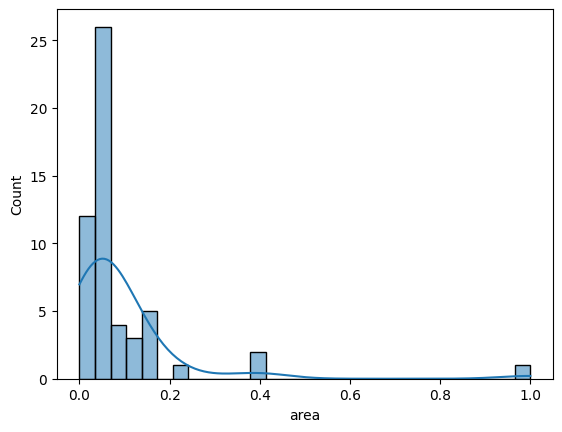

In [19]:
sns.histplot(data=imovel_norm, x="area", kde=True)

<Axes: xlabel='preco', ylabel='Count'>

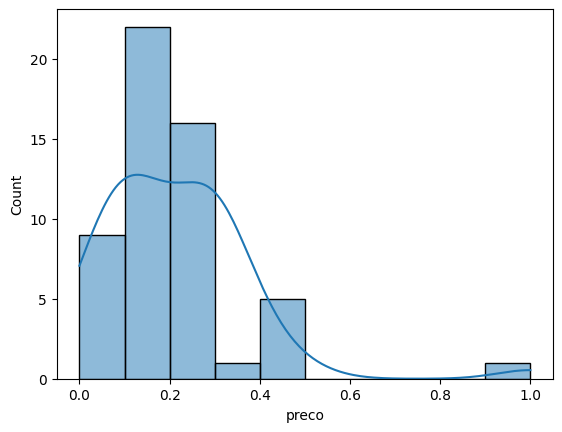

In [20]:
sns.histplot(data=imovel_norm, x="preco", kde=True)

<Axes: xlabel='area', ylabel='preco'>

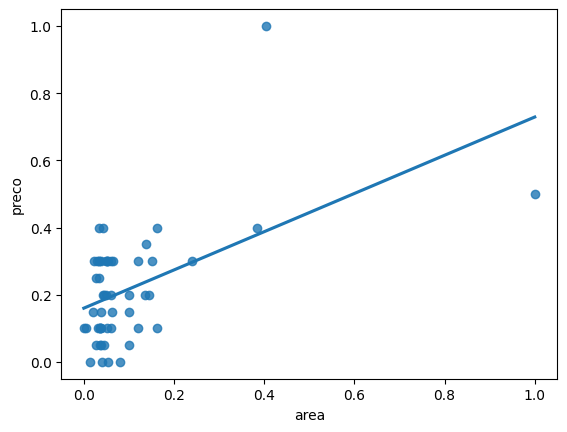

In [22]:
sns.regplot(x = "area", y = "preco", ci = None, data = imovel_norm) 

In [23]:
import statsmodels.formula.api as smf

In [28]:
function = 'preco~area'
model =smf.ols(formula=function, data=imovel_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     18.41
Date:                Sat, 06 May 2023   Prob (F-statistic):           7.76e-05
Time:                        01:32:36   Log-Likelihood:                 29.402
No. Observations:                  54   AIC:                            -54.80
Df Residuals:                      52   BIC:                            -50.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1600      0.023      6.942      0.0

In [29]:
x = imovel_norm[["area"]]

y = imovel_norm[["preco"]]

In [40]:
#Separando os dados de Treino e Teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=0)

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_treino,y_treino)

LinearRegression()

In [33]:
r_sq = lr.score(x, y)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.2605855251089535


In [37]:
y_pred_treino = lr.predict(x_treino)
print('MAE:', metrics.mean_absolute_error(y_treino, y_pred_treino))
print('MSE:', metrics.mean_squared_error(y_treino, y_pred_treino))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino)))

MAE: 0.11073939847055926
MSE: 0.02199011048242153
RMSE: 0.14829062843761076


MAE (Erro Absoluto Médio) = é a média do valor absoluto dos erros;

MSE (Erro Quadrático Médio) = é a média dos erros quadráticos;

RMSE (Erro Médio Quadrático da Raiz) = é a raiz quadrática da média dos erros quadráticos.

In [41]:
y_pred = lr.predict(x_teste)
print('MAE:', metrics.mean_absolute_error(y_teste, y_pred))
print('MSE:', metrics.mean_squared_error(y_teste, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred)))

MAE: 0.09597308346376429
MSE: 0.010896976011935268
RMSE: 0.10438858180823833
